In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (20,20)
%matplotlib inline

In [3]:
# Reading the google stock prize data for 5 years
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
# Extracting the 'Open' Column from dataset
training_data = dataset_train.iloc[:,1:2].values

In [26]:
# Checking the shape of 'open' column
training_data

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

Text(0.5, 1.0, 'Google Stock price from 1/3/2012 - 12/30/2016')

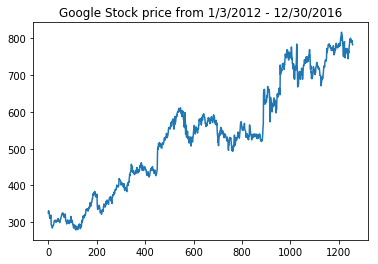

In [36]:
plt.plot(training_data)
plt.title("Google Stock price from 1/3/2012 - 12/30/2016")

In [8]:
# Normalize the training data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
training_data_scaled = scaler.fit_transform(training_data)

In [9]:
len(training_data_scaled)

1258

In [10]:
# creating data strcutre with 60 timesteps and 1 output
X_train = []
y_train = []

for i in range(60,len(training_data_scaled)):
    X_train.append(training_data_scaled[i-60:i,0])
    y_train.append(training_data_scaled[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [11]:
# Reshaping

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

'''Input shape

3D tensor with shape (batch_size, timesteps, input_dim)'''

'Input shape\n\n3D tensor with shape (batch_size, timesteps, input_dim)'

In [12]:
# Building RNN network

from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

Using TensorFlow backend.


In [13]:
regressor = Sequential()

# Adding 4 layers on LSTM
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))


W1123 11:55:38.337526  1596 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1123 11:55:38.361463  1596 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1123 11:55:38.366449  1596 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1123 11:55:41.361749  1596 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1123 11:55:41.398267  1596 deprecation.py:506] From F:\Anaconda\lib\site-packages\keras\backend\t

In [14]:
# Adding output layer

regressor.add(Dense(units=1))

In [15]:
# Compiling the model

regressor.compile(optimizer='adam',loss='mean_squared_error')

W1123 11:55:57.778781  1596 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [16]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

In [17]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

W1123 11:56:02.255682  1596 deprecation.py:323] From F:\Anaconda\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1123 11:56:09.282208  1596 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1198/1198 [==============================] - 36s 30ms/step - loss: 0.0504
Epoch 2/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0070
Epoch 3/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0064
Epoch 4/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0050
Epoch 5/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0052
Epoch 6/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0045
Epoch 7/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0042
Epoch 10/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0046
Epoch 11/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0040
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 13s 11ms/step - loss: 0.0016
Epoch 96/100
1198/1198 [==============================] - 13s 10ms/step - loss: 0.0017
Epoch 97/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0017


In [18]:
X_train.shape

(1198, 60, 1)

In [19]:
y_train.shape

(1198,)

In [20]:
regressor.save("RNN_StockPricePrediction.h5")

In [21]:
# serialize model to JSON
model_json = regressor.to_json()
with open("RNN_StockPricePrediction.json", "w") as json_file:
    json_file.write(model_json)

In [22]:
#Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [23]:
predicted_stock_price = regressor.predict(X_test)

In [24]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

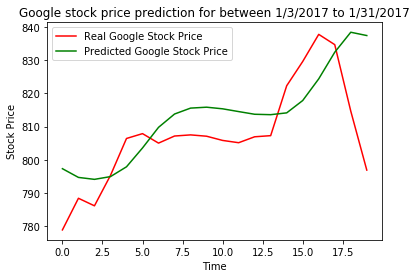

In [32]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='green',label='Predicted Google Stock Price')
plt.title("Google stock price prediction for between 1/3/2017 to 1/31/2017")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()